# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы

Научиться: 

*   генерировать новые признаки; 
*   нормализовать и кодировать данные с помощью lambda-функций и библиотеки scikit-learn.


## Что входит в практическую работу

1. Построить признаки из строк.
2. Преобразовать категориальные переменные.
3. Стандартизировать данные.
4. Использовать MinMaxScaler для нормализации данных.
5. Создать признаки на основе дат.
6. Сохранить датафрейм для этапа моделирования.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`— идентификатор записи;
- `url`— URL-записи о продаже;
- `region`— регион;
- `region_url`— URL региона;
- `price`— стоимость;
- `year`— год выпуска;
- `manufacturer`— производитель;
- `model`— модель;
- `condition`— состояние;
- `cylinders`— количество цилиндров;
- `fuel`— тип топлива;
- `odometer`— количество пройденных миль;
- `title_status`— статус;
- `transmission`— коробка передач;
- `VIN`— идентификационный номер;
- `drive`— тип привода;
- `size`— размер;
- `type`— кузов;
- `paint_color`— цвет;
- `image_url`— URL изображения;
- `description`— указанное описание;
- `county`— страна;
- `state`— штат;
- `lat`— широта;
- `long`— долгота;
- `posting_date`— дата размещения объявления о продаже;
- `price_category`— категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые пять записей и список колонок.

In [2]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset_upd6.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,is_jeep,is_honda,is_nissan,x0_diesel,x0_electric,x0_gas,x0_hybrid,x0_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0,0,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


In [ ]:
df.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc',
       'price_k$', 'age_category', 'model_len', 'model_word_count', 'is_audi',
       'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep', 'is_honda',
       'is_nissan', 'x0_diesel', 'x0_electric', 'x0_gas', 'x0_hybrid',
       'x0_other', 'std_scaled_odometer', 'std_scaled_price'],
      dtype='object')

2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [4]:
# Ваш код здесь

print(df['model'], '\n', '\n','Kоличество уникальных значений для модели автомобиля -', df['model'].nunique())

0          2500 crew cab big horn
1            explorer 4wd 4dr xlt
2                golf r hatchback
3                            rav4
4          1 series 128i coupe 2d
                  ...            
9614                         rav4
9615                     wrangler
9616    a3 2.0t premium plus pzev
9617                      cayenne
9618       1500 crew cab big horn
Name: model, Length: 9619, dtype: object 
 
 Kоличество уникальных значений для модели автомобиля - 3341


In [5]:
df.model.value_counts()

f-150                        145
other                        107
silverado 1500               105
1500                          99
camry                         76
                            ... 
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
silverado 1500 ls              1
a3 2.0t premium plus pzev      1
Name: model, Length: 3341, dtype: int64

3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [6]:
# Ваш код здесь с помощью str
df.model.str.split().str[0]

0           2500
1       explorer
2           golf
3           rav4
4              1
          ...   
9614        rav4
9615    wrangler
9616          a3
9617     cayenne
9618        1500
Name: model, Length: 9619, dtype: object

In [7]:
# Ваш код здесь с помощью lambda
df['short_model'] = df.model.apply(lambda x: x.split()[0])
df.short_model.value_counts()

silverado    392
1500         205
wrangler     204
grand        201
f-150        197
            ... 
sle            1
classuc        1
s3             1
cts-v          1
gs350          1
Name: short_model, Length: 943, dtype: int64

### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [8]:
# Ваш код здесь
df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']].nunique()

short_model     943
transmission      3
region          393
manufacturer     40
state            51
title_status      6
age_category      3
dtype: int64

2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [9]:
# Ваш код здесь
data = df[['short_model', 'transmission', 
           'region', 'manufacturer', 'state', 'title_status', 'age_category']]
data

,short_model,transmission,region,manufacturer,state,title_status,age_category
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,1,other,knoxville,bmw,tn,clean,average
...,...,...,...,...,...,...,...
9614,rav4,automatic,chautauqua,toyota,ny,clean,old
9615,wrangler,other,binghamton,jeep,ny,clean,average
9616,a3,automatic,salem,audi,or,clean,average
9617,cayenne,automatic,madison,porsche,wi,clean,new


3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [10]:
# Ваш код здесь
from sklearn.preprocessing import OneHotEncoder
#создание объекта OneHotEncoder
#sparse=False - указывает, что матрица не должна быть в разреженном формате, 
#то есть будет удобной для восприятия
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [11]:
# Ваш код здесь
ohe.fit(data[['short_model', 'transmission', 
           'region', 'manufacturer', 'state', 'title_status', 'age_category']])

OneHotEncoder(sparse=False)

5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [12]:
# Ваш код здесь
ohe_data = ohe.transform(data[['short_model', 'transmission', 
           'region', 'manufacturer', 'state', 'title_status', 'age_category']])
ohe_data


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

6. Выведите новые наименования признаков с помощью метода `get_feature_names_out`.

In [13]:
# Ваш код здесь
ohe.get_feature_names()

array(['x0_-benz', 'x0_1', 'x0_124', ..., 'x6_average', 'x6_new',
       'x6_old'], dtype=object)

7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [14]:
# Ваш код здесь
df[ohe.get_feature_names()] = ohe_data
df.columns


C:\Users\HP Z2\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer',
       ...
       'x4_wy', 'x5_clean', 'x5_lien', 'x5_missing', 'x5_parts only',
       'x5_rebuilt', 'x5_salvage', 'x6_average', 'x6_new', 'x6_old'],
      dtype='object', length=1483)

8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [15]:
# Ваш код здесь
ohe.inverse_transform(ohe_data)

array([['2500', 'other', 'chattanooga', ..., 'tn', 'clean', 'new'],
       ['explorer', 'automatic', 'north jersey', ..., 'nj', 'clean',
        'new'],
       ['golf', 'other', 'reno / tahoe', ..., 'ca', 'clean', 'new'],
       ...,
       ['a3', 'automatic', 'salem', ..., 'or', 'clean', 'average'],
       ['cayenne', 'automatic', 'madison', ..., 'wi', 'clean', 'new'],
       ['1500', 'other', 'norfolk / hampton roads', ..., 'va', 'clean',
        'new']], dtype=object)

### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [16]:
# Ваш код здесь
quantitative_variables = ['lat', 'long', 'year', 'odometer/price',
                          'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
data  = df[quantitative_variables]
data

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5
1,40.821805,-74.061962,2016,3.542852,968,0,20,4
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5
...,...,...,...,...,...,...,...,...
9614,42.123900,-79.189500,2002,33.370412,1710,0,4,1
9615,43.216990,-77.755610,2008,7.835323,948,0,8,1
9616,44.925908,-122.982753,2011,16.696387,909,0,25,5
9617,43.029559,-89.397796,2015,1.941787,3644,0,7,1


2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [17]:
# Ваш код здесь
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [18]:
# Ваш код здесь
std_scaler.fit(data)

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [19]:
# Ваш код здесь
print('Среднее:', std_scaler.mean_)
print('Дисперсия', std_scaler.var_)
std_scaled = std_scaler.transform(data)
std_scaled.shape

Среднее: [ 3.86020949e+01 -9.38968752e+01  2.01155588e+03  1.49164223e+01
  2.74520511e+03  3.69581038e-01  1.19280590e+01  2.16883252e+00]
Дисперсия [3.27263136e+01 3.18851860e+02 4.07743752e+01 7.96705726e+02
 7.55022892e+06 5.62793839e+00 7.49967998e+01 2.19563530e+00]


(9619, 8)

5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [20]:
# Ваш код здесь 'lat', 'long', 'year', 'odometer/price',
#               'desc_len', 'model_in_desc', 'model_len', 'model_word_count'
std_quantitative_variables = ['std_lat', 'std_long', 'std_year', 'std_odometer/price',
               'std_desc_len', 'std_model_in_desc', 'std_model_len', 'std_model_word_count']

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [21]:
# Ваш код здесь
data[std_quantitative_variables]  = std_scaled
data.head()


C:\Users\HP Z2\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count,std_lat,std_long,std_year,std_odometer/price,std_desc_len,std_model_in_desc,std_model_len,std_model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,40.821805,-74.061962,2016,3.542852,968,0,20,4,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669


In [22]:
data.columns

Index(['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc',
       'model_len', 'model_word_count', 'std_lat', 'std_long', 'std_year',
       'std_odometer/price', 'std_desc_len', 'std_model_in_desc',
       'std_model_len', 'std_model_word_count'],
      dtype='object')

### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [23]:
# Ваш код здесь
from sklearn.preprocessing import MinMaxScaler

2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [24]:
# Ваш код здесь
data_lat_long = data[['lat', 'long']]
data_lat_long

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,35.970000,-83.940000
...,...,...
9614,42.123900,-79.189500
9615,43.216990,-77.755610
9616,44.925908,-122.982753
9617,43.029559,-89.397796


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [25]:
#создаем объект scaler_mm класса MinMaxScaler() с параметрами по умолчанию
scaler_mm = MinMaxScaler()

In [26]:
# Ваш код здесь
scaler_mm.fit(data_lat_long)

MinMaxScaler()

In [27]:
#с помощью метода fit идентифицируем параметры сразу для двух признаков 'lat', 'long'
scaled_mm = scaler_mm.transform(data_lat_long)
scaled_mm.shape


(9619, 2)

In [28]:
#создаем переменную под количественные переменные lat, long
mm_variables = ['lat_mm', 'long_mm']

In [29]:
#Проведем стандартизацию с помощью StandardScaler
#импортируем StandardScaler
from sklearn.preprocessing import StandardScaler
#создаем объект std_scaler класса StandardScaler с параметрами по умолчанию
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [30]:
#с помощью метода fit идентифицируем параметры сразу для двух признаков 
std_scaler.fit(data_lat_long)

StandardScaler()

In [31]:
#с помощью метода transform для признаков обработаем стандартизацию
std_scaled = std_scaler.transform(data_lat_long)
std_scaled.shape

(9619, 2)

In [32]:
#создаем переменную под количественные переменные lat, long
std_variables = ['lat_std', 'long_std']

In [33]:
#Добавим признаки StandardScaler в новые колонки
data_lat_long[std_variables]  = std_scaled
data_lat_long.head()

C:\Users\HP Z2\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,lat,long,lat_std,long_std
0,35.060000,-85.250000,-0.619172,0.484245
1,40.821805,-74.061962,0.388014,1.110800
2,33.779214,-84.411811,-0.843059,0.531185
3,35.715954,-78.655304,-0.504509,0.853562
4,35.970000,-83.940000,-0.460101,0.557607


In [34]:
#Добавим признаки MinMaxScaler в новые колонки
data_lat_long[mm_variables]  = scaled_mm
data_lat_long.head()

C:\Users\HP Z2\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,lat,long,lat_std,long_std,lat_mm,long_mm
0,35.060000,-85.250000,-0.619172,0.484245,0.341769,0.288699
1,40.821805,-74.061962,0.388014,1.110800,0.468665,0.333055
2,33.779214,-84.411811,-0.843059,0.531185,0.313561,0.292022
3,35.715954,-78.655304,-0.504509,0.853562,0.356215,0.314844
4,35.970000,-83.940000,-0.460101,0.557607,0.361810,0.293893


4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [35]:
# Ваш код здесь
all_variables = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
data_lat_long[all_variables]

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.619172,0.341769,-85.250000,0.484245,0.288699
1,40.821805,0.388014,0.468665,-74.061962,1.110800,0.333055
2,33.779214,-0.843059,0.313561,-84.411811,0.531185,0.292022
3,35.715954,-0.504509,0.356215,-78.655304,0.853562,0.314844
4,35.970000,-0.460101,0.361810,-83.940000,0.557607,0.293893
...,...,...,...,...,...,...
9614,42.123900,0.615626,0.497341,-79.189500,0.823646,0.312727
9615,43.216990,0.806702,0.521415,-77.755610,0.903947,0.318411
9616,44.925908,1.105428,0.559052,-122.982753,-1.628875,0.139104
9617,43.029559,0.773939,0.517287,-89.397796,0.251959,0.272255


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [36]:
# Ваш код здесь
data_lat_long[all_variables].describe()

,lat,lat_std,lat_mm,long,long_std,long_mm
count,9619.000000,9.619000e+03,9619.000000,9619.000000,9.619000e+03,9619.000000
mean,38.602095,2.108662e-16,0.419779,-93.896875,-4.267993e-16,0.254418
std,5.720989,1.000052e+00,0.125997,17.857352,1.000052e+00,0.070797
min,19.541726,-3.331829e+00,0.000000,-158.069300,-3.593801e+00,0.000000
25%,34.920000,-6.436450e-01,0.338685,-106.944340,-7.306875e-01,0.202690
50%,39.300000,1.219966e-01,0.435149,-87.845800,3.388739e-01,0.278408
75%,42.382100,6.607601e-01,0.503028,-80.678711,7.402470e-01,0.306822
max,64.947500,4.605283e+00,1.000000,94.163200,1.053179e+01,1.000000


6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

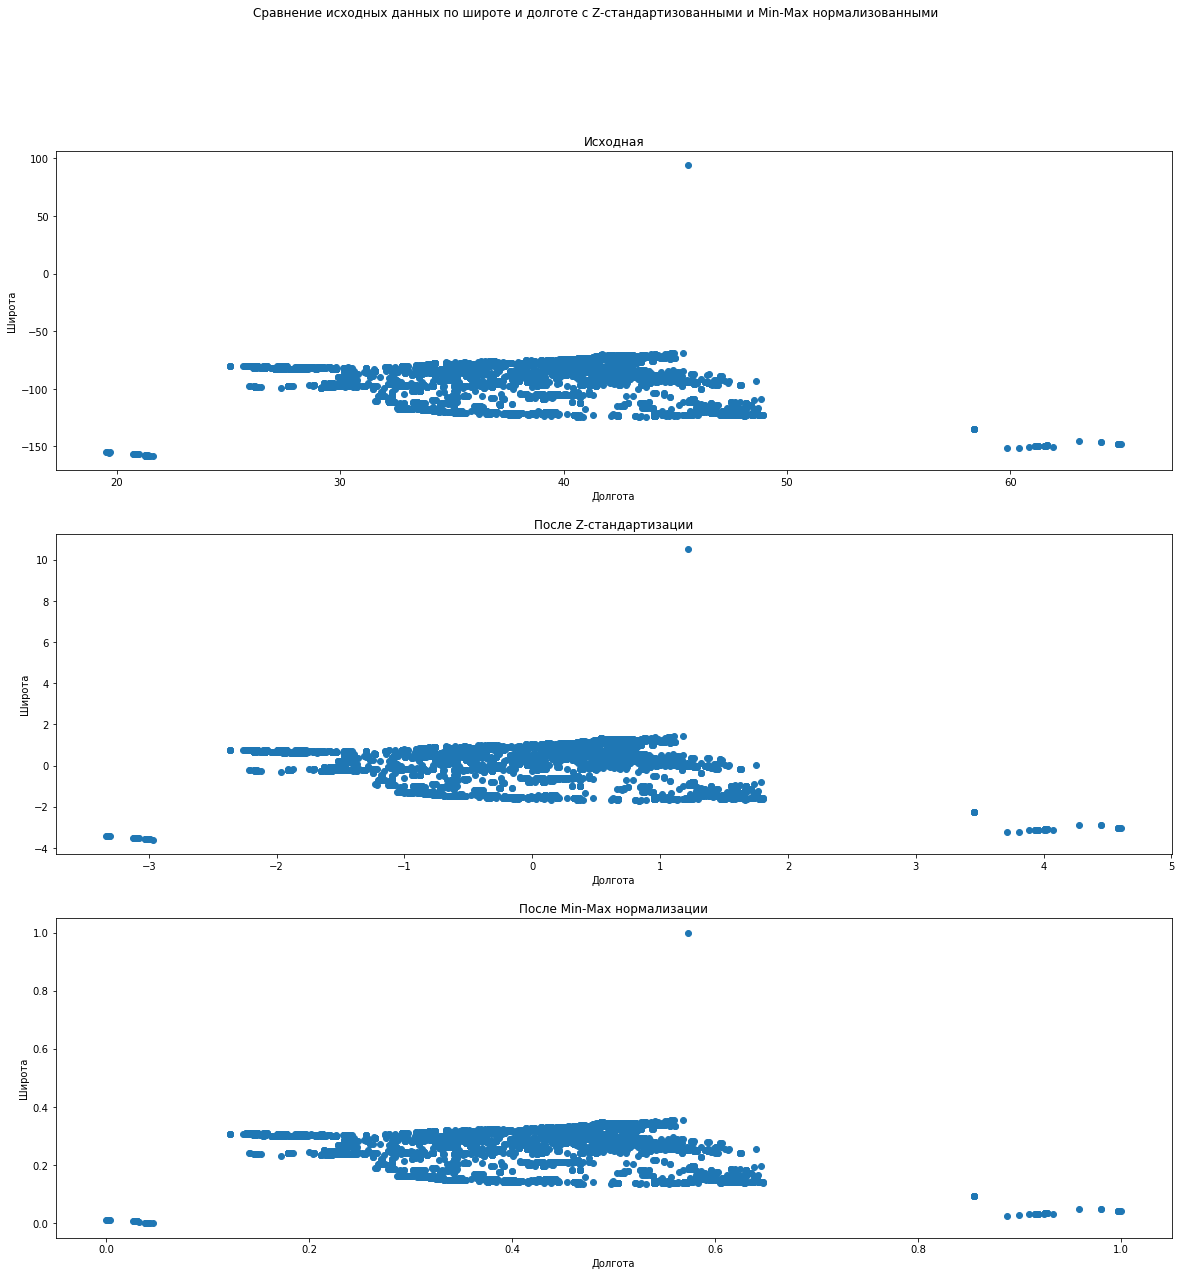

In [37]:
# Ваш код здесь
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

ax1.scatter(data_lat_long.lat, data_lat_long.long)
ax1.set_title('Исходная')
ax1.set_ylabel('Широта')
ax1.set_xlabel('Долгота')

ax2.scatter(data_lat_long.lat_std, data_lat_long.long_std)
ax2.set_title('После Z-стандартизации')
ax2.set_ylabel('Широта')
ax2.set_xlabel('Долгота')

ax3.scatter(data_lat_long.lat_mm, data_lat_long.long_mm)
ax3.set_title('После Min-Max нормализации')
ax3.set_ylabel('Широта')
ax3.set_xlabel('Долгота')

fig.suptitle('Сравнение исходных данных по широте и долготе с Z-стандартизованными и Min-Max нормализованными');

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`. 

In [38]:
# Ваш код здесь
df[['posting_date', 'date']]

,posting_date,date
0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
4,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00
...,...,...
9614,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
9615,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
9616,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
9617,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [39]:
# Ваш код здесь
df['date'].dtype
#https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas

#Здесь я прочитал, что 

#When you see dtype('O') inside dataframe this means Pandas string.

dtype('O')

In [40]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

datetime64[ns, UTC]

3. Несколькими способами извлеките номер месяца продажи автомобиля.

3.1. Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [41]:
%%time
# Ваш код здесь
#c помощью str
df['posting_date'].str.split('-').str[1]

Wall time: 12 ms


0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

In [42]:
%%time 
#c помощью lambda
df['posting_date'].apply(lambda x: x.split('-')[1])

Wall time: 4.99 ms


0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

3.2. Из переменной `date` с помощью lambda-функции и метода `month`.

In [43]:
# это не то, но все же.... изучаю DatetimeIndex
pd.DatetimeIndex(df['date']).month


Int64Index([4, 5, 4, 4, 4, 5, 4, 4, 4, 4,
            ...
            5, 4, 4, 5, 4, 4, 5, 4, 4, 4],
           dtype='int64', name='date', length=9619)

In [44]:
df['date'].apply(lambda x: x.month)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

3.3. Из переменной `date` с помощью `dt` и метода `month`.

In [45]:
# Ваш код здесь
df['date'].dt.month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

4. Создайте любым из способов (3.2 или 3.3) признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [46]:
# Ваш код здесь
df['month_of_advt'] = df['date'].dt.month
df['month_of_advt']

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: month_of_advt, Length: 9619, dtype: int64

5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [47]:
# Ваш код здесь
df['dayofweek'] = df['date'].dt.day
df['dayofweek']

0       17
1        3
2       28
3       17
4        8
        ..
9614    10
9615     3
9616    22
9617    14
9618    24
Name: dayofweek, Length: 9619, dtype: int64

6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [48]:
# Ваш код здесь
df['diff_years'] = df['date'].dt.year - df.year
df[['year','date','diff_years']]

,year,date,diff_years
0,2020,2021-04-17 16:30:50+00:00,1
1,2016,2021-05-03 19:40:21+00:00,5
2,2017,2021-04-28 10:52:20+00:00,4
3,2013,2021-04-17 14:08:57+00:00,8
4,2012,2021-04-08 19:10:56+00:00,9
...,...,...,...
9614,2002,2021-04-10 20:33:57+00:00,19
9615,2008,2021-05-03 13:36:30+00:00,13
9616,2011,2021-04-22 19:14:01+00:00,10
9617,2015,2021-04-14 14:14:42+00:00,6


7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [49]:
# Ваш код здесь
df.head()



,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x5_missing,x5_parts only,x5_rebuilt,x5_salvage,x6_average,x6_new,x6_old,month_of_advt,dayofweek,diff_years
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,17,1
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,3,5
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,28,4
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,17,8
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,8,9


In [50]:
month_dayofweek_diff_years = df[['month_of_advt', 'dayofweek','diff_years']]
month_dayofweek_diff_years

,month_of_advt,dayofweek,diff_years
0,4,17,1
1,5,3,5
2,4,28,4
3,4,17,8
4,4,8,9
...,...,...,...
9614,4,10,19
9615,5,3,13
9616,4,22,10
9617,4,14,6


In [51]:
#создаем объект std_scaler класса StandardScaler с параметрами по умолчанию
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [52]:
# с помощью метода fit идентифицируем параметры сразу для month_dayofweek_diff_years
std_scaler.fit(month_dayofweek_diff_years)

StandardScaler()

In [53]:
#с помощью метода transform для признаков 'odometer', 'price' обработаем стандартизацию
#(Z-масштабирование)

std_scaled = std_scaler.transform(month_dayofweek_diff_years)
std_scaled

array([[-0.61584563,  0.17095187, -1.32239376],
       [ 1.62378353, -1.21005622, -0.69597272],
       [-0.61584563,  1.25602966, -0.85257798],
       ...,
       [-0.61584563,  0.66416905,  0.08705357],
       [-0.61584563, -0.12497843, -0.53936746],
       [-0.61584563,  0.86145592, -0.85257798]])

In [54]:
#Добавим их в новые колонки
df[['month_std', 'dayofweek_std', 'diff_years_std' ]] = std_scaled
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x5_salvage,x6_average,x6_new,x6_old,month_of_advt,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,1.0,0.0,4,17,1,-0.615846,0.170952,-1.322394
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,1.0,0.0,5,3,5,1.623784,-1.210056,-0.695973
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,1.0,0.0,4,28,4,-0.615846,1.256030,-0.852578
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,4,17,8,-0.615846,0.170952,-0.226157
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,1.0,0.0,0.0,4,8,9,-0.615846,-0.716839,-0.069552


### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [55]:
# Допишите код
# month = month_of_advt ошибочно его назвал, но потом 
# первоначально выдало KeyError: "['lat_mm', 'long_mm', 'odometer/price_std'] not in index"
# 'odometer/price_std' создадим здесь, ранее не создавался (насколько помню)


columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date', 'std_scaled_price',
                    'month_of_advt', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df[['lat_mm', 'long_mm']] = data_lat_long[['lat_mm', 'long_mm']] #перевод признаков из другой таблицы
df[['month']] = df[['month_of_advt']] #перевод признака в month
df[columns_for_drop]


KeyError: "['odometer/price_std'] not in index"

In [56]:
#создаем объект std_scaler класса StandardScaler с параметрами по умолчанию
std_scaler = StandardScaler()
std_scaler

# с помощью метода fit идентифицируем параметры сразу для df[['odometer/price_std']]
std_scaler.fit(df[['odometer/price']])

#с помощью метода transform для признаков 'odometer', 'price' обработаем стандартизацию
#(Z-масштабирование)
std_scaled = std_scaler.transform(df[['odometer/price']])
std_scaled

#Добавим их в новые колонки
df[['odometer/price_std']] = std_scaled


In [57]:
df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,month_of_advt,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std,lat_mm,long_mm,month,odometer/price_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,4,17,1,-0.615846,0.170952,-1.322394,0.341769,0.288699,4,-0.510784
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,5,3,5,1.623784,-1.210056,-0.695973,0.468665,0.333055,5,-0.402947
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,4,28,4,-0.615846,1.256030,-0.852578,0.313561,0.292022,4,-0.514480
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,4,17,8,-0.615846,0.170952,-0.226157,0.356215,0.314844,4,-0.241883
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,4,8,9,-0.615846,-0.716839,-0.069552,0.361810,0.293893,4,-0.333074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,...,4,10,19,-0.615846,-0.519552,1.496501,0.497341,0.312727,4,0.653795
9615,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,...,5,3,13,1.623784,-1.210056,0.556869,0.521415,0.318411,5,-0.250872
9616,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,...,4,22,10,-0.615846,0.664169,0.087054,0.559052,0.139104,4,0.063061
9617,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,...,4,14,6,-0.615846,-0.124978,-0.539367,0.517287,0.272255,4,-0.459670


In [58]:
df_prepared = df.drop(columns=columns_for_drop)

2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [62]:
# Ваш код здесь
df_prepared

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,...,x5_parts only,x5_rebuilt,x5_salvage,x6_average,x6_new,x6_old,month_std,dayofweek_std,diff_years_std,month
0,7308295377,54990,high,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.615846,0.170952,-1.322394,4
1,7316380095,16942,medium,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.623784,-1.210056,-0.695973,5
2,7313733749,35590,high,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.615846,1.256030,-0.852578,4
3,7308210929,14500,medium,0,0,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.615846,0.170952,-0.226157,4
4,7303797340,14590,medium,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.615846,-0.716839,-0.069552,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,7304876387,4495,low,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.615846,-0.519552,1.496501,4
9615,7316152972,14495,medium,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.623784,-1.210056,0.556869,5
9616,7310993818,8995,low,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.615846,0.664169,0.087054,4
9617,7306637427,31900,high,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.615846,-0.124978,-0.539367,4


In [63]:
df_prepared.shape

(9619, 1457)

In [64]:
df_prepared.columns

Index(['id', 'price', 'price_category', 'is_audi', 'is_ford', 'is_chevrolet',
       'is_toyota', 'is_jeep', 'is_honda', 'is_nissan',
       ...
       'x5_parts only', 'x5_rebuilt', 'x5_salvage', 'x6_average', 'x6_new',
       'x6_old', 'month_std', 'dayofweek_std', 'diff_years_std', 'month'],
      dtype='object', length=1457)

3. Запишите преобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [65]:
# Ваш код здесь
df_prepared.to_csv('data/vehicles_dataset_prepared.csv', index=False)

## Описание преобразованного датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`— стоимость;
- `price_category`– категория цены.